In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv("AQI and Lat Long of Countries.csv")
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [ ]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [ ]:
print('No2 AQI Categories')
print(df['NO2 AQI Category'].value_counts())
print('\nCO AQI Categories')
print(df['CO AQI Category'].value_counts())
print('\nPM2.5 AQI Categories')
print(df['PM2.5 AQI Category'].value_counts())
print('\nOzone AQI Categories')
print(df['Ozone AQI Category'].value_counts())

No2 AQI Categories
Good        16684
Moderate       11
Name: NO2 AQI Category, dtype: int64

CO AQI Categories
Good                              16691
Unhealthy for Sensitive Groups        3
Moderate                              1
Name: CO AQI Category, dtype: int64

PM2.5 AQI Categories
Good                              7936
Moderate                          6882
Unhealthy for Sensitive Groups     881
Unhealthy                          828
Very Unhealthy                     115
Hazardous                           53
Name: PM2.5 AQI Category, dtype: int64

Ozone AQI Categories
Good                              15529
Moderate                            806
Unhealthy for Sensitive Groups      176
Unhealthy                           159
Very Unhealthy                       25
Name: Ozone AQI Category, dtype: int64


In [ ]:
#membuang kategori aqi CO dan NO2 karena hanya satu jenis - tidak perlu untuk klasifikasi

df.drop(['NO2 AQI Category','CO AQI Category'],axis=1,inplace=True)

In [ ]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,36,Good,0,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,5,Good,1,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,5,Good,1,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,39,Good,2,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,34,Good,0,20,Good,53.0167,20.8833


Text(0, 0.5, 'Latitude')

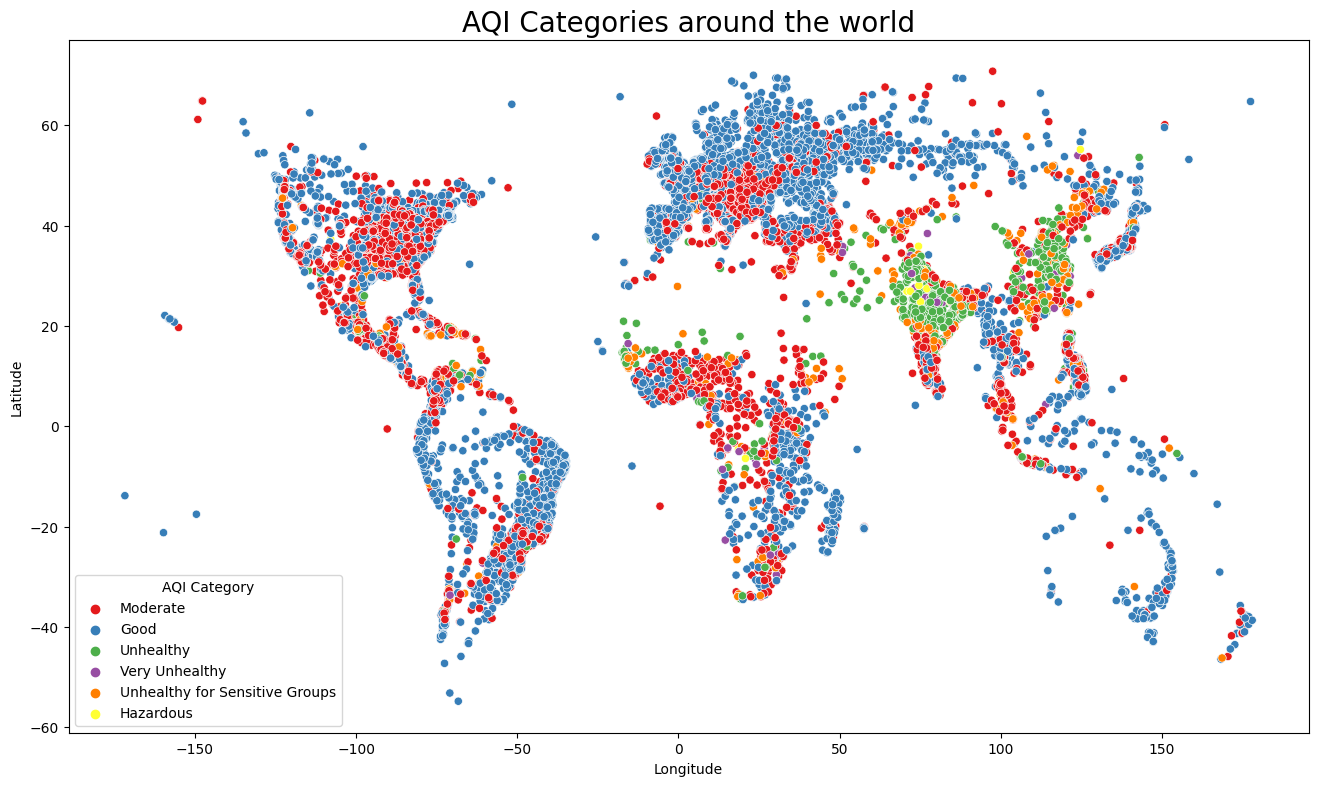

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='lng',y='lat',hue='AQI Category',palette='Set1')
plt.title('AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

**Feature Engineering**

In [ ]:
ozoneCate = pd.get_dummies(df['Ozone AQI Category'],prefix="Ozone")
df=pd.concat([df,ozoneCate],axis=1)
df.drop(['Ozone AQI Category'],axis=1,inplace=True)

In [ ]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng,Ozone_Good,Ozone_Moderate,Ozone_Unhealthy,Ozone_Unhealthy for Sensitive Groups,Ozone_Very Unhealthy
0,Russian Federation,Praskoveya,51,Moderate,1,36,0,51,Moderate,44.7444,44.2031,1,0,0,0,0
1,Brazil,Presidente Dutra,41,Good,1,5,1,41,Good,-5.2900,-44.4900,1,0,0,0,0
2,Brazil,Presidente Dutra,41,Good,1,5,1,41,Good,-11.2958,-41.9869,1,0,0,0,0
3,Italy,Priolo Gargallo,66,Moderate,1,39,2,66,Moderate,37.1667,15.1833,1,0,0,0,0
4,Poland,Przasnysz,34,Good,1,34,0,20,Good,53.0167,20.8833,1,0,0,0,0


In [ ]:
pmCate = pd.get_dummies(df['PM2.5 AQI Category'],prefix='PM2.5')
df = pd.concat([df,pmCate],axis=1)
df.drop(['PM2.5 AQI Category'],axis=1,inplace=True)

In [ ]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng,...,Ozone_Moderate,Ozone_Unhealthy,Ozone_Unhealthy for Sensitive Groups,Ozone_Very Unhealthy,PM2.5_Good,PM2.5_Hazardous,PM2.5_Moderate,PM2.5_Unhealthy,PM2.5_Unhealthy for Sensitive Groups,PM2.5_Very Unhealthy
0,Russian Federation,Praskoveya,51,Moderate,1,36,0,51,44.7444,44.2031,...,0,0,0,0,0,0,1,0,0,0
1,Brazil,Presidente Dutra,41,Good,1,5,1,41,-5.2900,-44.4900,...,0,0,0,0,1,0,0,0,0,0
2,Brazil,Presidente Dutra,41,Good,1,5,1,41,-11.2958,-41.9869,...,0,0,0,0,1,0,0,0,0,0
3,Italy,Priolo Gargallo,66,Moderate,1,39,2,66,37.1667,15.1833,...,0,0,0,0,0,0,1,0,0,0
4,Poland,Przasnysz,34,Good,1,34,0,20,53.0167,20.8833,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#Terlalu banyak kota untuk diubah menjadi nilai numerik -- turun
print('Num of countries: ',df['Country'].nunique())
print('Num of cities: ',df['City'].nunique())
df.drop(['City','Country'],axis=1,inplace=True)

Num of countries:  174
Num of cities:  14229


In [ ]:
df.head()

,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng,Ozone_Good,Ozone_Moderate,Ozone_Unhealthy,Ozone_Unhealthy for Sensitive Groups,Ozone_Very Unhealthy,PM2.5_Good,PM2.5_Hazardous,PM2.5_Moderate,PM2.5_Unhealthy,PM2.5_Unhealthy for Sensitive Groups,PM2.5_Very Unhealthy
0,51,Moderate,1,36,0,51,44.7444,44.2031,1,0,0,0,0,0,0,1,0,0,0
1,41,Good,1,5,1,41,-5.2900,-44.4900,1,0,0,0,0,1,0,0,0,0,0
2,41,Good,1,5,1,41,-11.2958,-41.9869,1,0,0,0,0,1,0,0,0,0,0
3,66,Moderate,1,39,2,66,37.1667,15.1833,1,0,0,0,0,0,0,1,0,0,0
4,34,Good,1,34,0,20,53.0167,20.8833,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
#model creation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

#split data into testing and training sets
X=df.drop('AQI Category',axis=1)
y=df['AQI Category']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

**Feature Scaling +Data Classification**

In [ ]:
##proses pembuatan model: membuat pipeline, menyesuaikan pipeline dengan model klasifikasi, membuat prediksi dan mengevaluasi model menggunakan pengujian dan validasi silang
def makePipe(model,name):
    '''
    Membuat pipeline dengan langkah-langkah normalisasi dan klasifikasi
    Sesuaikan data pelatihan dan label dengan model
    '''


    pipeline = Pipeline([
        ('Scale',Normalizer()),
        ('classifier',model())
    ])

    #normalize test data
    normalized_x_test = pd.DataFrame(
        Normalizer().fit_transform(X_test),
        columns = X_test.columns)

    #fit the data to model + make predictions
    pipeline.fit(X_train,y_train)
    preds = pipeline.predict(normalized_x_test)

    print('Classifier: ' ,name)

    #print confusion matrix
    plotConfusionMatrix(preds,pipeline.classes_)

    eva = evaluation(preds)

    validation(pipeline)



def evaluation(preds):
    '''
    Mencetak laporan Klasifikasi dan skor akurasi
    '''
    print('\n',classification_report(y_test,preds))
    print('\nSkor Akurasi Pelatihan: ',accuracy_score(y_test,preds))
    return (accuracy_score(y_test,preds))

def plotConfusionMatrix(preds,classes):

    #make confusion matrix display
    cm=confusion_matrix(y_test,preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
    fig =plt.figure(figsize=(20,8))
    disp.plot()
    plt.xticks(rotation = 75, ha = 'right')
    plt.title('Confusion Matrix')


def validation(model):
    '''
    Mencetak Validasi silang 5 lipatan akurasi dan std
    '''
    scores = cross_val_score(model,X_train,y_train,cv=5)
    print('Akurasi Validasi Silang: %0.2f (+/- %0.2f)'%(scores.mean(),scores.std()*2))

Classifier:  Gaussian Naive Bayes

                                 precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      2337
                     Hazardous       0.90      1.00      0.95        27
                      Moderate       1.00      1.00      1.00      2093
                     Unhealthy       1.00      1.00      1.00       268
Unhealthy for Sensitive Groups       1.00      1.00      1.00       248
                Very Unhealthy       0.97      0.92      0.94        36

                      accuracy                           1.00      5009
                     macro avg       0.98      0.98      0.98      5009
                  weighted avg       1.00      1.00      1.00      5009


Skor Akurasi Pelatihan:  0.9990017967658216
Akurasi Validasi Silang: 1.00 (+/- 0.00)


<Figure size 2000x800 with 0 Axes>

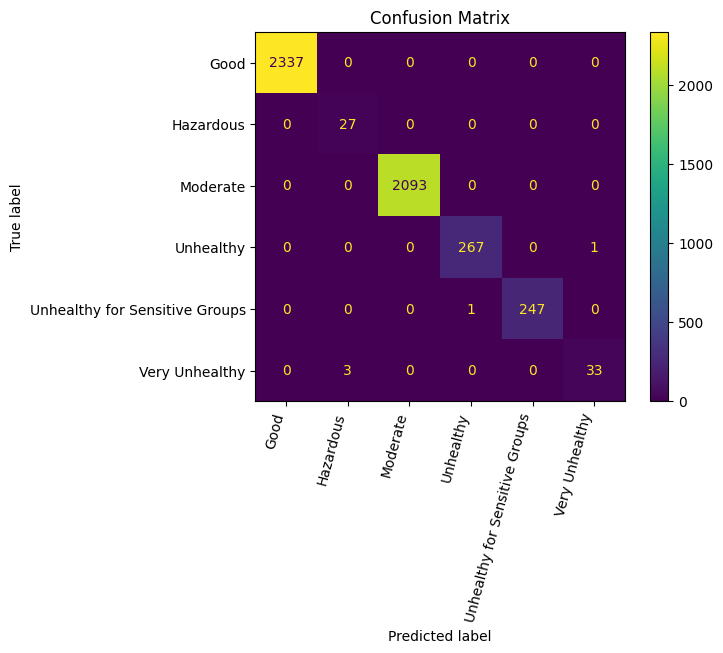

In [ ]:
nbPipe = makePipe(GaussianNB, 'Gaussian Naive Bayes')